In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# reading file from directory
df=pd.read_csv('googleplaystore.csv',encoding='unicode_escape')

In [3]:
# Top 5 records
df.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [4]:
# Basic information about datafrma
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          9366 non-null   float64
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


#### There are total 13 columns and 10840 records(rows)

# Task-1 : Data Cleaning

### 1. Data clean up — Missing value treatment
### a. Drop records where rating is missing since rating is our target/study variable

In [5]:
# checking which columns has missing values
df.isnull().sum()

Rating            1474
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

#### Rating column has 1474 missing values,Type has 1,Current Ver has 8 and Android ver has 2 missing values.

In [6]:
# Finding indexes of all missing values in Rating column.
df[df['Rating'].isnull()].index

Int64Index([   23,   113,   123,   126,   129,   130,   134,   163,   180,
              185,
            ...
            10815, 10817, 10820, 10821, 10822, 10823, 10824, 10830, 10834,
            10837],
           dtype='int64', length=1474)

In [7]:
# Dropping all null values from Rating column
df.drop(index=df[df['Rating'].isnull()].index,inplace=True)

In [8]:
df.isnull().sum()

Rating            0
App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

## b. Check the null values for the Android Ver column

In [9]:
df[df['Android Ver'].isnull()]

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,4.4,[substratum] Vacuum: P,PERSONALIZATION,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,20-Jul-18,4.4,NaN
4490,4.5,Pi Dark [substratum],PERSONALIZATION,189,2.1M,"10,000+",Free,0,Everyone,Personalization,27-Mar-18,1.1,NaN


### Repalce missing values with mode(most occuring)

In [10]:
# here we are finding the mode value of the Android Ver Column and then storing it in the new variable called x
x=df['Android Ver'].mode()[0]
x

'4.1 and up'

In [11]:
# filling those null values with the mode() value 
df['Android Ver'].fillna(x,inplace=True)

# c. Current ver – replace with most common value

In [12]:
# finding the mode value of the Current Ver column and storing it in the new variable called y
y=df['Current Ver'].mode()[0]
y

'Varies with device'

In [13]:
df['Current Ver'].fillna(y,inplace=True)

In [14]:
df.isnull().sum()

Rating            0
App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### There are no null values in DataFrame

# 2. Data clean up – correcting the data types
# a. Which all variables need to be brought to numeric types?

In [15]:
df.head(3)

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          9366 non-null   float64
 1   App             9366 non-null   object 
 2   Category        9366 non-null   object 
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


##### From this information, we can see that, the column  Installs and Price have the numeric data so we can convert these columns into the numeric types, but there are also 2 columns which are Current Ver and Android Ver can be conevert into the numeric type but in those columnn there are some strig values which we can drop it or replace it

# b. Price Variable - Remove $ sign and conver to float

In [17]:
# here we are replacing the $ amd also converting the type of it to the numeric
df['Price'] = pd.to_numeric(df['Price'].str.replace('$',''))

C:\Users\sadiq\AppData\Local\Temp\ipykernel_15884\3908950467.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = pd.to_numeric(df['Price'].str.replace('$',''))


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          9366 non-null   float64
 1   App             9366 non-null   object 
 2   Category        9366 non-null   object 
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


# c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [19]:
# replacing the given condition using this syntax
df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',','').str.replace("+",""))

C:\Users\sadiq\AppData\Local\Temp\ipykernel_15884\2538247168.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',','').str.replace("+",""))


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          9366 non-null   float64
 1   App             9366 non-null   object 
 2   Category        9366 non-null   object 
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


# 3. Sanity checks – check for the following and handle accordingly
# a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
# i. Are there any such records? Drop if so.

In [21]:
df[df['Rating']>5]

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### There are no such records which have rating greater than 5, so we don't need to drop anything from the given dataset



# b. Reviews should not be more than installs as only those who installed can review the app.
# i. Are there any such records? Drop if so

In [22]:
sum(df['Reviews']>df['Installs'])

7

In [23]:
df[df['Reviews']>df['Installs']]

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,5.0,KBA-EZ Health Guide,MEDICAL,4,25M,1,Free,0.00,Everyone,Medical,02-Aug-18,1.0.72,4.0.3 and up
4663,4.8,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,10249,Varies with device,10000,Paid,2.49,Everyone,Lifestyle,30-Jul-18,Varies with device,Varies with device
5917,5.0,Ra Ga Ba,GAME,2,20M,1,Paid,1.49,Everyone,Arcade,08-Feb-17,1.0.4,2.3 and up
6700,5.0,Brick Breaker BR,GAME,7,19M,5,Free,0.00,Everyone,Arcade,23-Jul-18,1,4.1 and up
7402,5.0,Trovami se ci riesci,GAME,11,6.1M,10,Free,0.00,Everyone,Arcade,11-Mar-17,0.1,2.3 and up
8591,5.0,DN Blog,SOCIAL,20,4.2M,10,Free,0.00,Teen,Social,23-Jul-18,1,4.0 and up
10696,5.0,Mu.F.O.,GAME,2,16M,1,Paid,0.99,Everyone,Arcade,03-Mar-17,1,2.3 and up


#### There are seven apps(records) where reviews are greater than installs

In [24]:
df[df['Reviews']>df['Installs']].index

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10696], dtype='int64')

In [25]:

df.drop(index=df[df['Reviews']>df['Installs']].index,inplace=True)

In [26]:
df[df['Reviews']>df['Installs']]

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### After performing the operations, we found 7 such records which were greater than the installs so we droped those records So, now there are no such records that is Review which are greater than the installs

# 4. Identify and handle outliers –
# a. Price column
# i. Make suitable plot to identify outliers in price


<AxesSubplot:>

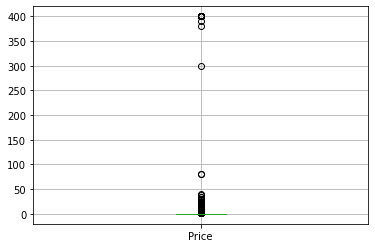

In [28]:
df.boxplot('Price')


#### So, after ploting the boxplot for the Price column, we can see that there are some outliers present in the price column And from this we can assume that, there are outliers beyond value 50

# ii. Do you expect apps on the play store to cost $200? Check out these cases

In [31]:
df[df['Price']>300]

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,4.3,most expensive app (H),FAMILY,6,1.5M,100,Paid,399.99,Everyone,Entertainment,16-Jul-18,1,7.0 and up
4362,3.8,ð I'm rich,LIFESTYLE,718,26M,10000,Paid,399.99,Everyone,Lifestyle,11-Mar-18,1.0.0,4.4 and up
4367,3.6,I'm Rich - Trump Edition,LIFESTYLE,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,03-May-18,1.0.1,4.1 and up
5351,3.8,I am rich,LIFESTYLE,3547,1.8M,100000,Paid,399.99,Everyone,Lifestyle,12-Jan-18,2,4.0.3 and up
5354,4.0,I am Rich Plus,FAMILY,856,8.7M,10000,Paid,399.99,Everyone,Entertainment,19-May-18,3,4.4 and up
5356,4.1,I Am Rich Premium,FINANCE,1867,4.7M,50000,Paid,399.99,Everyone,Finance,12-Nov-17,1.6,4.0 and up
5357,2.9,I am extremely Rich,LIFESTYLE,41,2.9M,1000,Paid,379.99,Everyone,Lifestyle,01-Jul-18,1,4.0 and up
5358,3.8,I am Rich!,FINANCE,93,22M,1000,Paid,399.99,Everyone,Finance,11-Dec-17,1,4.1 and up
5359,3.5,I am rich(premium),FINANCE,472,965k,5000,Paid,399.99,Everyone,Finance,01-May-17,3.4,4.4 and up
5362,4.4,I Am Rich Pro,FAMILY,201,2.7M,5000,Paid,399.99,Everyone,Entertainment,30-May-17,1.54,1.6 and up


In [32]:
sum(df['Price']>200)

15

In [35]:
df[df['Price']>200].index

Int64Index([4197, 4362, 4367, 5351, 5354, 5355, 5356, 5357, 5358, 5359, 5362,
            5364, 5366, 5369, 5373],
           dtype='int64')

In [36]:
df.drop(index=df[df['Price']>200].index,inplace=True)

In [38]:
df[df['Price']>200]

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### Here we have droped the records which are greater than 200 (cost more than 200)



# iii. After dropping the useless records, make the suitable plot again to identify outliers

<AxesSubplot:>

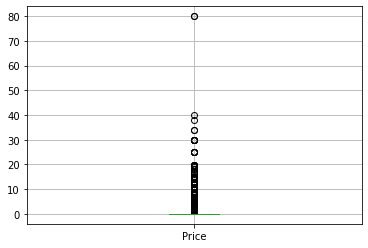

In [39]:
df.boxplot('Price')


In [40]:
df[df['Price']>30]

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,4.6,Vargo Anesthesia Mega App,MEDICAL,92,32M,1000,Paid,79.99,Everyone,Medical,18-Jun-18,19,4.0.3 and up
2301,3.5,A Manual of Acupuncture,MEDICAL,214,68M,1000,Paid,33.99,Everyone,Medical,02-Oct-17,2.1.35,4.0 and up
2365,4.6,Vargo Anesthesia Mega App,MEDICAL,92,32M,1000,Paid,79.99,Everyone,Medical,18-Jun-18,19,4.0.3 and up
2402,3.5,A Manual of Acupuncture,MEDICAL,214,68M,1000,Paid,33.99,Everyone,Medical,02-Oct-17,2.1.35,4.0 and up
2414,4.0,LTC AS Legal,MEDICAL,6,1.3M,100,Paid,39.99,Everyone,Medical,04-Apr-18,3.0.1,4.1 and up
5360,4.2,I am Rich Person,LIFESTYLE,134,1.8M,1000,Paid,37.99,Everyone,Lifestyle,18-Jul-17,1,4.0.3 and up


#### After ploting the boxplot for the price column, we got some outliers which we can see and we can say that the outliers are beyond 50 or we can also say that there are outliers beyond the average line so we can also drop that

# iv. Limit data to records with price < $30

In [43]:
sum(df['Price']<30)

9338

# b. Reviews column
# i. Make suitable plot


<AxesSubplot:>

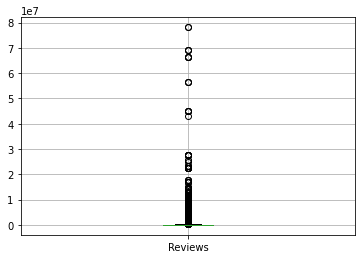

In [44]:
df.boxplot('Reviews')

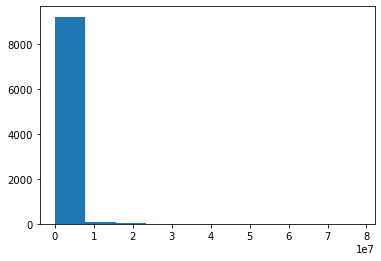

In [47]:
h=df['Reviews']
plt.hist(h)
plt.show()

# ii. Limit data to apps with < 1 Million reviews

In [51]:
sum(df['Reviews']<1000000)

8640

# Data analysis to answer business questions

# What are the top Content Rating values?

In [54]:
x=df['Content Rating'].value_counts()

Everyone           7400
Teen               1082
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

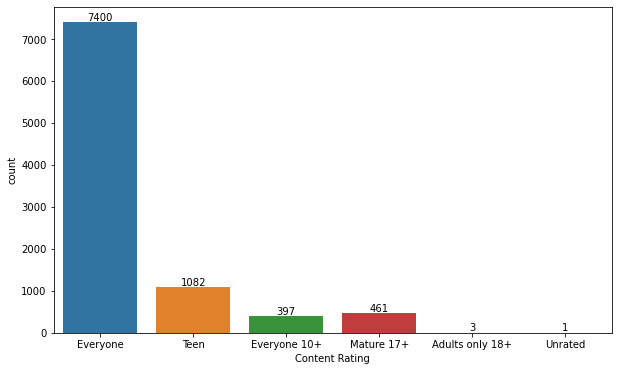

In [69]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x=df['Content Rating'],data=df)
for bars in ax.containers:
    ax.bar_label(bars)

### From above bar chart we can say that Rating 'Everyone' has more popularity and rating 'Adults only 18+' has less popularity

<Figure size 720x432 with 0 Axes>

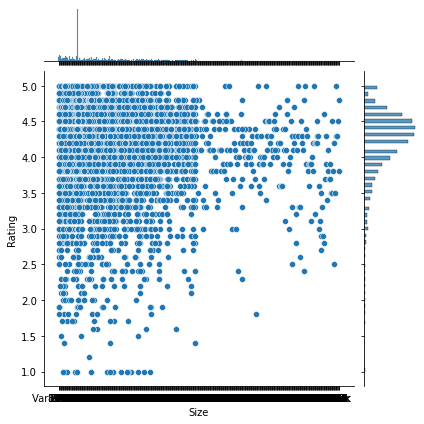

In [73]:
plt.figure(figsize=(10,6))
sns.jointplot(x='Size',y='Rating',data=df)
plt.show()

### Yes, from the given plot, we can say that there is correlation between Size and Rating From the given plot, we can see that, on increase in the Rating, the size also increases and there is positive correlation between Size and Rating

#  Effect of price on rating

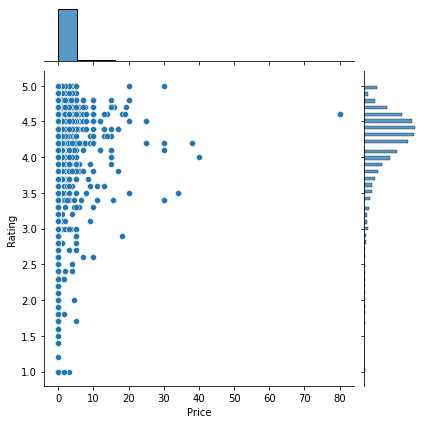

In [74]:
sns.jointplot(x='Price',y='Rating',data=df)

#### From the given plot, we can say that, on increase in the Price, the Rating remains constant which is greater than 4
#### So, here as on increase in price the rating remains constant which greater than 4 so we can say that, there is weak positive correlation between Rating and Price





# Make a bar plot displaying the rating for each content rating

<AxesSubplot:xlabel='Content Rating'>

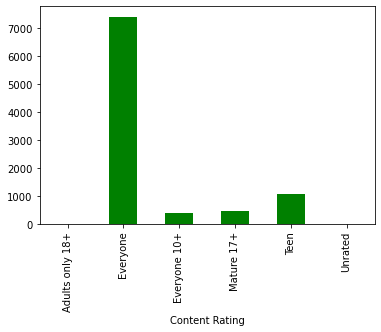

In [78]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="green")